DEBUG: this Jupyter Notebook and images copied from https://github.com/jonescompneurolab/hnn-workshop-materials/blob/master/alpha_beta_tutorial_hnn_core.ipynb and nearby folders

# Welcome to the HNN-Core Alpha and Beta tutorial

## Getting Started
This tutorial follows the [HNN-GUI tutorial](https://jonescompneurolab.github.io/hnn-tutorials/alpha_and_beta/alpha_and_beta) with python commands instead of through a graphical user interface. We'll begin with some background on the experimental data used in this tutorial, and then give you a quick introduction to the HNN-Core API. Finally, we'll show you how to adjust model parameters to test specific hypotheses using HNN simulations.

## 0. Scientific Background

In order to understand the workflow and initial parameter sets provided with this tutorial, we must first briefly describe prior studies that led to the creation of the data you will aim to simulate. This tutorial is based on results from Jones et al. 2009 where, using MEG, we recorded spontaneous (pre-stimulus) alpha (7-14 Hz) and beta (15-20 Hz) rhythms that arise as part of the mu-complex from the primary somatosensory cortex (S1) [^1]. (Figure 1. See also [^2], [^3], [^4].)

### Figure 1
![](images/image03.png)

**Figure 1 Left**: Spectrogram of spontaneous activity from current dipole source in SI averaged across 100 trials, from an example subject, shows nearly continuous prestimulus alpha and beta oscillations. At time zero, a brief tap was given to the contralateral finger tip and the spontaneous oscillations briefly desynchronized.

**Figure 1 Right**: A closer look at the prestimulus waveform and spectrogram from spontaneous activity during example signal trials, shows that the alpha and beta oscillations occur intermittently and primarily non-overlapping.

Our goal was to use our neocortical model to reproduce features of the waveform and spectrogram observed on single unaveraged trials (Figure 2 top panel, right) where the alpha and beta components emerge briefly and intermittently in time. On any individual trial (i.e., 1 second of spontaneous data), the presence of alpha and beta activity is not time locked and representative of so-called “induced” activity. Seemingly continuous bands of activity occur only when averaging the spectrograms across trials (Figure 2 top panel, left), and this is due to the fact that the spectrograms values are strictly positive and the alpha and beta events accumulate without cancellation [4].

### Figure 2
![](images/old-image29.png)
**Figure 2**: Key features of the spontaneous non-average SI alpha/beta complex include, intermittent transient bouts of alpha/beta activity, a waveform that oscillates around 0nAm, PSD with peaks in the alpha and beta bands, primarily non-overlapping alpha and beta events, and a symmetric waveform oscillation. The model was able to reproduce each of these features.

We found that a sequence of exogenous subthreshold excitatory synaptic drive could activate the network in a manner that reproduced important features of the SI rhythms in the model (Figure 2). This drive consisted of two nearly-synchronous 10 Hz rhythmic drives that contacted the network through proximal and distal projection pathways (Figure 3). The drives were simulated as population “bursts” of action potentials that contacted the network every 100ms with the mean delay between the proximal and distal burst of 0ms. Specifically, as shown schematically in Figure 3, the population bursts consisted of 10, 2-spike bursts Gaussian distributed in time. We presumed that during such spontaneous activity, these drives may be provided by leminscial and non-lemniscal thalamic nuclei, which contact proximal and distal pyramidal neurons respectively, and they are know to burst fire at  ~10 Hz frequencies in spontaneous states [^5], [^6].

### Figure 3
![](images/image04.png)
**Figure 3**: Schematic illustration of exogenous 10 Hz burst drive through proximal and distal projection pathways.  “Population bursts”, consisting of a set number of “burst units” (10, 2-spike bursts shown) drive post-synaptic conductances in the local network with a set frequency (100 ms ISI) and mean delay between proximal and distal.

We assumed that the macroscale rhythms generating the observed alpha and beta activity arose from subthreshold current flow in a large population of neurons, as opposed to being generated by local spiking interaction. As such, the effective strengths of the exogenous driving inputs were tuned so that the cells in the network remained subthreshold (all other parameters were tuned and fixed base on the morphology, physiology and connectivity within layered neocortical circuits, see Jones et al. 2009 [1] for details). The inputs drove subthreshold currents up and down the pyramidal neurons to reproduce accurate waveform and spectrogram features (see Figure 3). A scaling factor of 3000 was multiplied by the model waveform to reproduce nAm units comparable to the recorded data, suggesting on the order 200 x 3000 = 600,000 pyramidal neurons contributed to this signal.

We further found that decreasing the delay between the drives to ~50ms created a pure alpha oscillation, while applying an ~0ms delay caused beta events to emerge and increased the strength of the distal drive, creating stronger beta activity (data not shown; see parameter exploration below). This result led to the novel prediction that brief beta events emerge from a broad proximal drive disrupted by a simultaneous strong distal drive that lasted 50ms (i.e., one beta period). Support for this prediction was found invasively with laminar recordings in mice and monkeys [3].

In this tutorial, we will explore parameter changes that illustrate these results. We will walk you step-by-step through simulations with various combinations of rhythmic proximal and distal drives to describe how each contributes to the alpha and beta components of the SI alpha/beta complex rhythm. We will begin by simulating only rhythmic proximal alpha frequency inputs (Step 1), followed by simulating only distal alpha frequency inputs (Step 2), followed by various combinations of proximal and distal drive to generate alpha and beta rhythms. We’ll show you how HNN can plot waveforms, time-frequency spectrograms, and power spectral density plots of the simulated data, as well as for imported recorded data.

### References
1. Jones, S. R. et al. Quantitative analysis and biophysically realistic neural modeling of the MEG mu rhythm: rhythmogenesis and modulation of sensory-evoked responses. J. Neurophysiol. 102, 3554–3572 (2009).

[^1]: Jones, S. R. et al. Quantitative analysis and biophysically realistic neural modeling of the MEG mu rhythm: rhythmogenesis and modulation of sensory-evoked responses. J. Neurophysiol. 102, 3554–3572 (2009). 

2. Ziegler, D. A. et al. Transformations in oscillatory activity and evoked responses in primary somatosensory cortex in middle age: a combined computational neural modeling and MEG study. Neuroimage 52, 897–912 (2010).

3. Sherman, M. A. et al. Neural mechanisms of transient neocortical beta rhythms: Converging evidence from humans, computational modeling, monkeys, and mice. Proc. Natl. Acad. Sci. U. S. A. 113, E4885–94 (2016).

4. Jones, S. R. When brain rhythms aren’t ‘rhythmic’: implication for their mechanisms and meaning. Curr. Opin. Neurobiol. 40, 72–80 (2016).

5. Jones, E. G. The thalamic matrix and thalamocortical synchrony. Trends Neurosci. 24, 595–601 (2001).

6. Hughes, S. W. & Crunelli, V. Thalamic mechanisms of EEG alpha rhythms and their pathological implications. Neuroscientist 11, 357–372 (2005).


## 0. Importing python libraries and loading data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import hnn_core
from hnn_core import jones_2009_model, simulate_dipole, MPIBackend, JoblibBackend, read_dipole
from hnn_core.viz import plot_dipole, plot_tfr_morlet, plot_psd

--No graphics will be displayed.


## 1. Simulating Rhythmic Proximal Inputs: Alpha Only

As described in the introduction, low-frequency alpha and beta rhythms can be simulated by a combination of rhythmic subthreshold proximal and distal ~10Hz inputs. Here, we begin by describing the impact of proximal inputs only.

### 1.1 Define network and drives
Let's start with instantiating our network. We will give it the unique name `net_alpha_prox` so that we can compare it with simulation results later on.

In [2]:
net_alpha_prox = jones_2009_model()

TODO AES nanosiemens? or uS? are drives vs real synapses using different units?

When defining drives, there are several parameters that must be defined. Here we start with connection weights and delays of our proximal drive. For the weights, there are AMPA and NMDA receptors on each cell type (pyramidal and basket cells). To specify the maximum conductance $\bar{g}$ in nanosiemens (nS), we will use a dictionary `weights_ampa_p` where the keys specify the cell type. The delay parameters `syn_delays_p` control the arrival time of each spike to the network. In this example, the delay to the layer 2/3 cells is 0.1 ms, with a slightly longer delay to the layer 5 cells of 1 ms.

Note that cells not specified in the dictionary will not recieve input from the drive. 

In [3]:
weights_ampa_p = {'L2_pyramidal': 5.4e-5, 'L5_pyramidal': 5.4e-5}
syn_delays_p = {'L2_pyramidal': 0.1, 'L5_pyramidal': 1.0}

net_alpha_prox.add_bursty_drive(
    'alpha_prox', tstart=50.0, tstart_std=0.0, burst_rate=10, burst_std=20, numspikes=2,
    spike_isi=10, n_drive_cells=10, location='proximal',
    weights_ampa=weights_ampa_p, synaptic_delays=syn_delays_p, event_seed=14)

The rhythmic proximal inputs defined above drive excitatory synapses in the neocortical network in a proximal projection pattern, as shown below AES in Figure 4. For further details on the connectivity structure of the network, see the (AES TODO link) Under the Hoodsection of the HNN website. Rhythmic proximal input occurs through stochastic, presynaptic bursts of action potentials from a population of bursting cells (set with `n_drive_cells`; see Figure 3) onto postsynaptic neurons of the modelled network. Stochasticity is introduced in two places: the spike train start time for each bursting cell is sampled from a normal distribution with mean start time mean (ms) `tstart` and standard deviation (ms) `tstart_std` and the inter-burst intervals for each bursting cell are sampled from a normal distribution of mean $\frac{1}{\mathrm{"Burst Frequency"}}$ (with "Burst Frequency" corresponding to `burst_rate`, e.g., a 100 ms inter-burst interval corresponds to a “Burst frequency” of 10 Hz) and standard deviation `burst_std` (see Figure 3). Also note that the number of spikes per burst unit is set with `num_spikes`, an inter-spike interval by `spike_isi`, and the final stop time for the entire population of rhythmic proximal inputs is set with `tstop` (here the parameter is not included which produces repeating bursts throughout the simulation).

### Figure 4

![](images/prox-drive.png)

We can check that the drives have been added by looking at

In [4]:
net_alpha_prox.external_drives

{'alpha_prox': <External drive 'alpha_prox'
 drive class: bursty
 target location: proximal
 target cell types: {'L2_pyramidal', 'L5_pyramidal'}
 number of drive cells: 10
 cell-specific: False
 dynamic parameters:
 	tstart: 50.0
 	tstart_std: 0.0
 	tstop: None
 	burst_rate: 10
 	burst_std: 20
 	numspikes: 2
 	spike_isi: 10>}

### 1.2 Run the simulation and visualize net current dipole
Now, we simulate the dipole with just one trial for now. Note that we have set `tstop` to 710 ms giving us a sufficiently long simulation to visualize oscillatory activity.

In [5]:
dpl_alpha_prox = simulate_dipole(net_alpha_prox, tstop=710.0, n_trials=1)

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Loading custom mechanism files from /opt/homebrew/Caskroom/miniconda/base/envs/py311/lib/python3.11/site-packages/hnn_core/mod/arm64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Trial 1: 170.0 ms...
Trial 1: 180.0 ms...
Trial 1: 190.0 ms...
Trial 1: 200.0 ms...
Trial 1: 210.0 ms...
Trial 1: 220.0 ms...
Trial 1: 230.0 ms...
Trial 1: 240.0 ms...
Trial 1: 250.0 ms...
Trial 1: 260.0 ms...
Trial 1: 270.0 ms...
Trial 1: 280.0 ms...
Trial 1: 290.0 ms...
Trial 1: 300.0 ms...
Trial 1: 310.0 ms...
Trial 1: 320.0 ms...
Trial 1: 330.0 ms...
Trial 1: 340.0 ms...
Trial 1: 350.0

The simulation is a bit slow. If we want to speed it up, we can use MPI. It's a protocol that splits the simulation across neurons. You might need to follow a few extra installation steps to install MPI dependencies if you wish to run `MPIBackend` on your machine (see [here](https://jonescompneurolab.github.io/hnn-core/stable/parallel.html)).

In [6]:
# simulate dipole with a specific parallel backend (1 trial)
# we'll use MPIBackend for the remainder of this tutorial as it is the fastest

n_procs = 8

with MPIBackend(n_procs=n_procs):
    dpl_alpha_prox = simulate_dipole(net_alpha_prox, tstop=710.0, n_trials=1)
    
# If you don't have the OpenMPI and mpi4py installed on you machine,
# you can alternatively use JoblibBackend (uncomment lines below) to 

# with JoblibBackend(n_jobs=n_procs):
#    dpls = simulate_dipole(net_alpha_prox, tstop=710.0, n_trials=1)


MPIBackend is set to use 1 core: tranferring the simulation to JoblibBackend....
Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model


/opt/homebrew/Caskroom/miniconda/base/envs/py311/lib/python3.11/site-packages/hnn_core/parallel_backends.py:631: UserWarning: mpi4py not installed. Will run on single processor
  warn(f'{packages} not installed. Will run on single processor')


[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Trial 1: 170.0 ms...
Trial 1: 180.0 ms...
Trial 1: 190.0 ms...
Trial 1: 200.0 ms...
Trial 1: 210.0 ms...
Trial 1: 220.0 ms...
Trial 1: 230.0 ms...
Trial 1: 240.0 ms...
Trial 1: 250.0 ms...
Trial 1: 260.0 ms...
Trial 1: 270.0 ms...
Trial 1: 280.0 ms...
Trial 1: 290.0 ms...
Trial 1: 300.0 ms...
Trial 1: 310.0 ms...
Trial 1: 320.0 ms...
Trial 1: 330.0 ms...
Trial 1: 340.0 ms...
Trial 1: 350.0 ms...
Trial 1: 360.0 ms...
Trial 1: 370.0 ms...
Trial 1: 380.0 ms...
Trial 1: 390.0 ms...
Trial 1: 400.0 ms...
Trial 1: 410.0 ms...
Trial 1: 420.0 ms...
Trial 1: 430.0 ms...
Trial 1: 440.0 ms...
Trial 1: 450.0 ms...
Trial 1: 460.0 ms...
Trial 1: 470.0 m

To help visualize simulation results, HNN-Core comes equipped with several visualization functions. You can learn more about the in built plotting functions by browsing some of the examples [here](https://jonescompneurolab.github.io/hnn-core/stable/auto_examples/index.html). For now, we are going to utilize the `plot_spike_hist()`, `plot_dipole()`, and `plot_tfr_morlet()` functions. Let's package these into a function so that we can reuse to visualize simulation results later on.

In [7]:
def simulation_plots(net, dpl, xlim=[0, 710]):
    # Set up 3 panel figure
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(7, 7), constrained_layout=True)

    # Plot histogram of proximal and distal drive spike times
    net.cell_response.plot_spikes_hist(ax=axes[0], show=False)
    axes[0].set_title('Input Histogram')

    # Plot aggregate current dipole
    plot_dipole(dpl, ax=axes[1], layer='agg', show=False, tmin=xlim[0], tmax=xlim[1])
    
    # Plot spectrogram with frequencies from 6 to 60 Hz in steps of 1 Hz
    freqs = np.arange(6.0, 30.0, 1.0)
    plot_tfr_morlet(dpl, freqs, n_cycles=7, ax=axes[2], tmin=xlim[0], tmax=xlim[1])
    axes[2].set_title('Spectrogram')

    return fig

From now on all we have to do is call the function `simulate_plots()` with the `Network` and `Dipole` objects to make our plots.

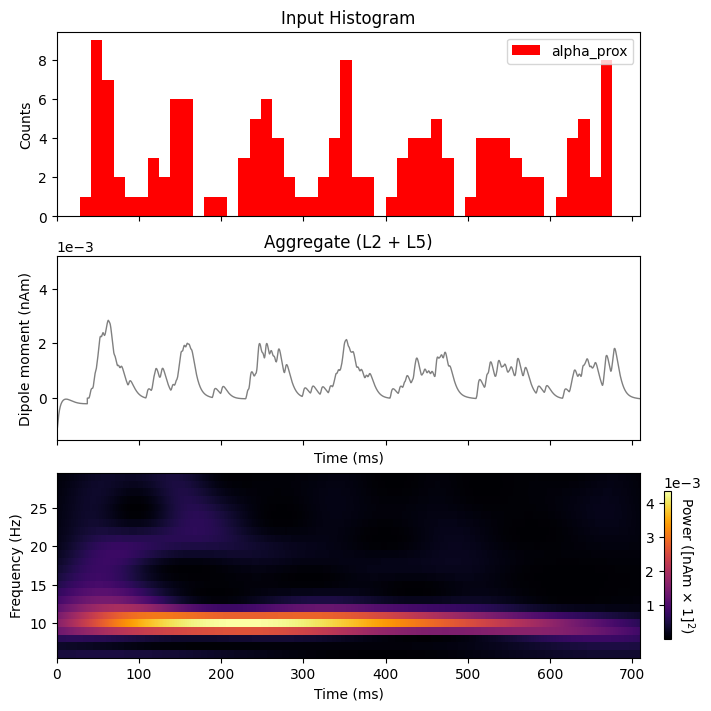

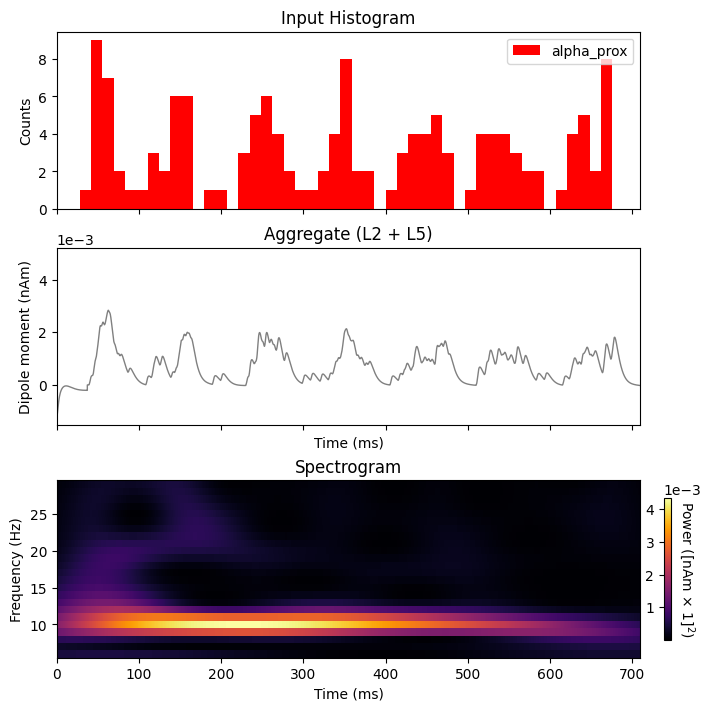

In [8]:
# AES TODO why does it show twice? maybe the dpl is a list?
simulation_plots(net_alpha_prox, dpl_alpha_prox)

In this parameter set, a burst of proximal input spikes is provided to the network ~10 Hz (i.e., every 100 ms). Due to the stochastic nature of the inputs (controlled by the `tstart`, `tstart_std`, `burst_std` parameters), there is some variability in the histogram of proximal input times. Note that a decrease in the `burst_std` would create shorter duration bursts (i.e., more synchronous bursts); this will be explored further in step 6.1 below.

The ~10 Hz bursts of proximal drive induces current flow up the pyramidal neuron dendrites increasing the signal above the 0 nAm baseline, which then relaxes back to zero, approximately every 100 ms. This is observed in the black current dipole waveform in the figure. The bottom panel shows the corresponding time-frequency spectrogram for this waveform that exhibits a high-power continuous 10 Hz signal. Importantly, in this example the strength of the proximal input was titrated to be subthreshold (i.e., cells do not spike) under the assumption that macroscale oscillations are generated primarily by subthreshold current flow across large populations of synchronous pyramidal neurons. In step 6.2 below, we explore differences in the signal when the cells are driven to spike (see also TODO AES link 'erp_tutorial_hnn_core.ipynb').

While this exploration with proximal drive is only useful in understanding how subthreshold rhythmic inputs impact the current dipole produced by the circuit, several features of the waveform and spectrogram of the signal do not match the recorded data shown in Figures 1and 2. Next, we explore the impact of rhythmic distal inputs only (step 2), and then a combination of the two (step 3).

## 2. Simulating Rhythmic Distal Inputs: Alpha Only
Having seen that proximal inputs alone push the current flow only in a single direction (positive), we can confirm that the same occurs if we provide only rhythmic distal inputs, which drive current flow in the pyramidal neuron dendrites, and hence current dipole signal, in the opposite direction (negative).

### 2.1 Define network and drives
We begin again by instantiating the network.

In [9]:
net_alpha_dist = jones_2009_model()

In [10]:
weights_ampa_d = {'L2_pyramidal': 5.4e-5, 'L5_pyramidal': 5.4e-5}
syn_delays_d = {'L2_pyramidal': 5.0, 'L5_pyramidal': 5.0}

net_alpha_dist.add_bursty_drive(
    'alpha_dist', tstart=50.0, tstart_std=0.0, burst_rate=10, burst_std=20, numspikes=2,
    spike_isi=10, n_drive_cells=10, location='distal',
    weights_ampa=weights_ampa_d, synaptic_delays=syn_delays_d, event_seed=14) # Need different seed?

### 2.2 Run the simulation and visualize net current dipole
Now we simulate the dipole.

In [11]:
with MPIBackend(n_procs=n_procs):
    dpl_alpha_dist = simulate_dipole(net_alpha_dist, tstop=710.0, n_trials=1)

# dpl_alpha_dist = simulate_dipole(net_alpha_dist, tstop=710.0, n_trials=1)

/opt/homebrew/Caskroom/miniconda/base/envs/py311/lib/python3.11/site-packages/hnn_core/parallel_backends.py:631: UserWarning: mpi4py not installed. Will run on single processor
  warn(f'{packages} not installed. Will run on single processor')


MPIBackend is set to use 1 core: tranferring the simulation to JoblibBackend....
Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Trial 1: 170.0 ms...
Trial 1: 180.0 ms...
Trial 1: 190.0 ms...
Trial 1: 200.0 ms...
Trial 1: 210.0 ms...
Trial 1: 220.0 ms...
Trial 1: 230.0 ms...
Trial 1: 240.0 ms...
Trial 1: 250.0 ms...
Trial 1: 260.0 ms...
Trial 1: 270.0 ms...
Trial 1: 280.0 ms...
Trial 1: 290.0 ms...
Trial 1: 300.0 ms...
Trial 1: 310.0 ms...
Trial 1: 320.0 ms...
Trial 1: 330.0 ms...
Trial 1: 340.0 ms...
Trial 1: 350.0 ms...
Trial 1: 360.0 ms...
Trial 1: 370.0 ms...
Trial 1: 380.0 ms...
Tr

We can use the in built plotting functions of hnn-core to visualize the simulated dipole.

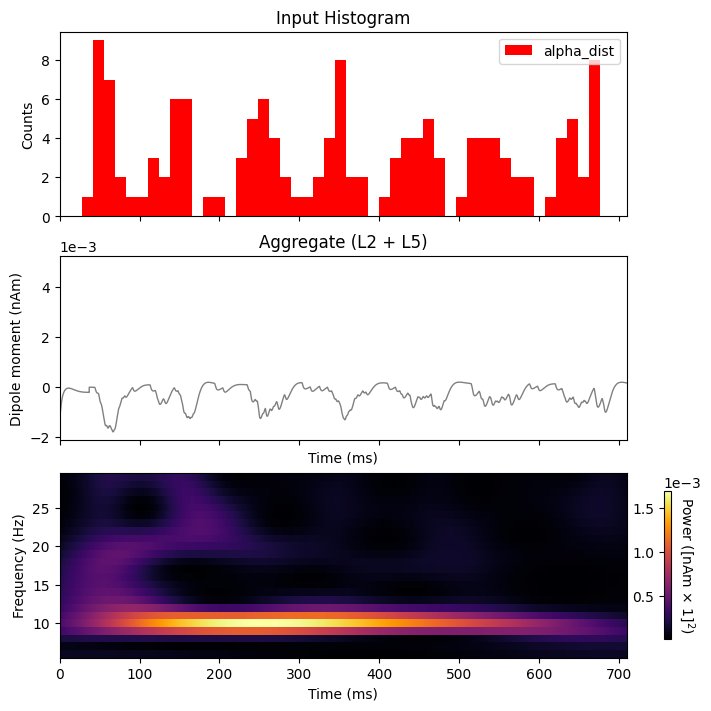

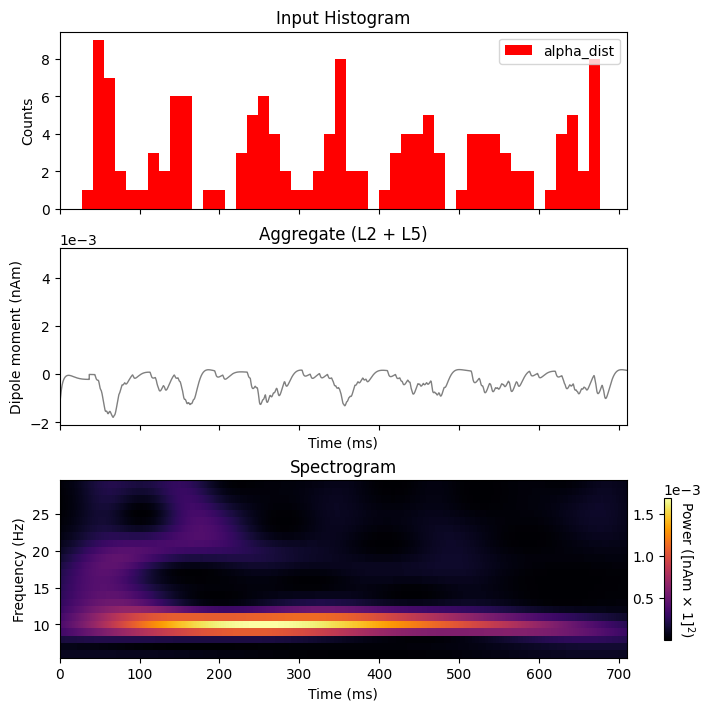

In [12]:
simulation_plots(net_alpha_dist, dpl_alpha_dist)

As shown in the histogram in the top panel of figure above, with this parameter set, a burst of distal input spikes is provided to the network ~10 Hz (i.e., every 100 ms). Due to the stochastic nature of the inputs (controlled by the start time stdev, and Burst stdev parameters), there is some variability in the histogram of proximal input times. The ~10 Hz bursts of distal input induces current flow down the pyramidal neuron dendrites decreasing the signal below the 0 nAm baseline, which then relaxes back to zero, approximately every 100 ms. This is observed in the black current dipole waveform in the figure. The bottom panel shows the corresponding time-frequency spectrogram for this waveform that exhibits a high power continuous 10 Hz signal. Importantly, in this example the strength of the distal input was also titrated to be subthreshold (i.e., cells do not spike) under the assumption that macroscale oscillations are generated primarily by subthreshold current flow across large populations of synchronous pyramidal neurons.  

While instructional, this simulation also does not produce waveform and spectral features that match the experimental data in Figures 1 and 2. In the next step (step 3), we describe how combining both the 10 Hz proximal and distal drives can produce an oscillation with many characteristic features of the spontaneous SI signal (Jones et al 2009).

## 3. Simulating Combined Rhythmic Proximal and Distal Inputs: Alpha/Beta Complex
In this simulation, the Start time mean (ms) values `tstart` for both proximal and distal inputs are set to 50.0 ms, and all other parameters are the same. Note that the synaptic weights are the same as used in the previous two simulations. The equal start time implies that the proximal and distal input bursts will arrive nearly synchronously to the network on each cycle of the 10 Hz input. Due to the stochasticity in the parameters (start time stdev, and Burst stdev) sometimes the bursts will arrive together and sometimes there will be a slight delay. As will be described further below, this stochasticity creates intermittent alpha and beta events.

### 3.1 Define network and drives
We begin by instantiating the network, and adding drives with the same functions as above. Note that the `event_seed` parameter must be changed, otherwise the spike times of the proximal and distal drive would be identical.

In [13]:
net_alpha_sync = jones_2009_model()

net_alpha_sync.add_bursty_drive(
    'alpha_prox', tstart=50.0, tstart_std=0.0, burst_rate=10, burst_std=20, numspikes=2,
    spike_isi=10, n_drive_cells=10, location='proximal',
    weights_ampa=weights_ampa_p, synaptic_delays=syn_delays_p, event_seed=10)

net_alpha_sync.add_bursty_drive(
    'alpha_dist', tstart=50.0, burst_rate=10, burst_std=20, numspikes=2,
    spike_isi=10, n_drive_cells=10, location='distal',
    weights_ampa=weights_ampa_d, synaptic_delays=syn_delays_d, event_seed=14)

### 3.2 Run the simulation and visualize net current dipole

In [14]:
with MPIBackend(n_procs=n_procs):
    dpl_alpha_sync = simulate_dipole(net_alpha_sync, tstop=710.0, n_trials=1)

# dpl_alpha_sync = simulate_dipole(net_alpha_sync, tstop=710.0, n_trials=1)

MPIBackend is set to use 1 core: tranferring the simulation to JoblibBackend....
Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Trial 1: 170.0 ms...
Trial 1: 180.0 ms...
Trial 1: 190.0 ms...
Trial 1: 200.0 ms...
Trial 1: 210.0 ms...
Trial 1: 220.0 ms...
Trial 1: 230.0 ms...
Trial 1: 240.0 ms...
Trial 1: 250.0 ms...
Trial 1: 260.0 ms...
Trial 1: 270.0 ms...
Trial 1: 280.0 ms...
Trial 1: 290.0 ms...
Trial 1: 300.0 ms...
Trial 1: 310.0 ms...
Trial 1: 320.0 ms...
Trial 1: 330.0 ms...
Trial 1: 340.0 ms...
Trial 1: 350.0 ms...
Trial 1: 360.0 ms...
Trial 1: 370.0 ms...
Trial 1: 380.0 ms...
Tr

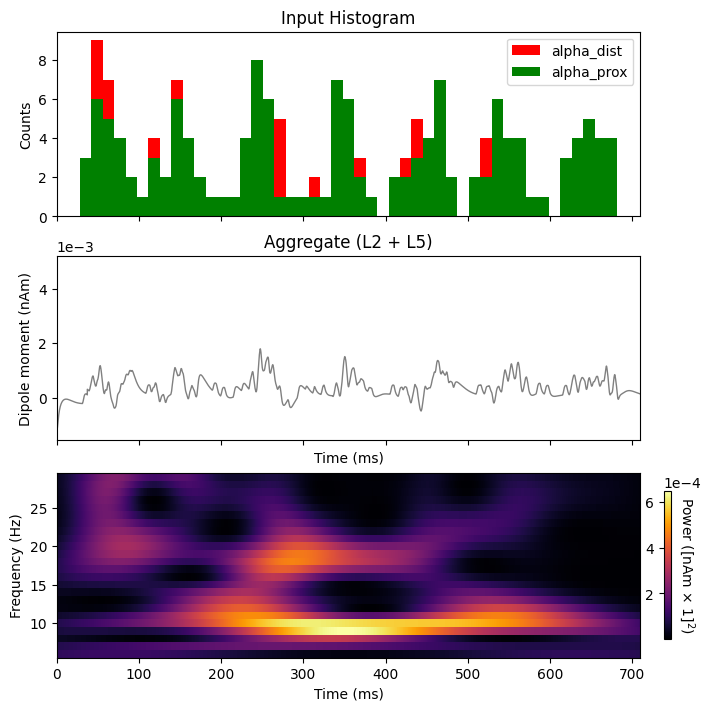

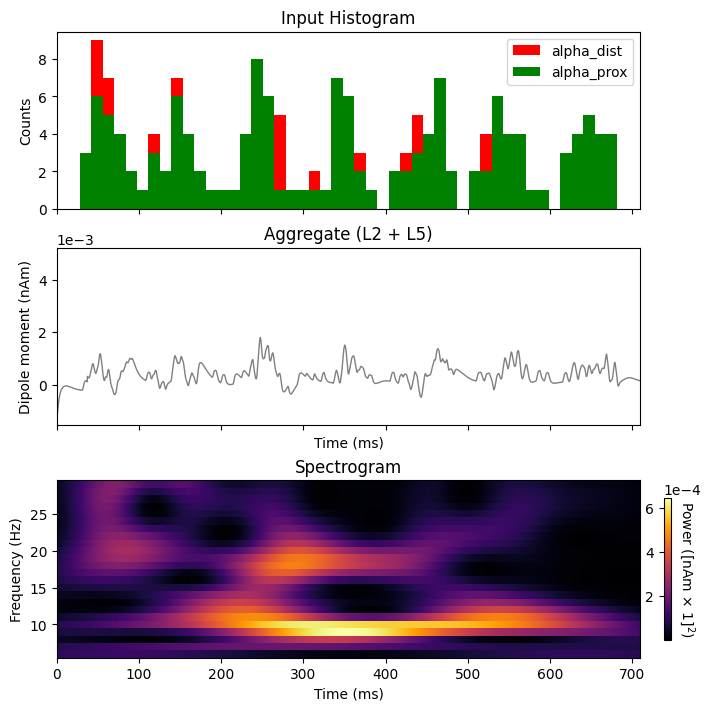

In [15]:
simulation_plots(net_alpha_sync, dpl_alpha_sync)

As shown in the green and red histogram in the top panel of the figure above, with this parameter set, bursts of both proximal and distal input spikes are provided to the network ~10 Hz (i.e., every 100 ms). Due to the stochastic nature of the inputs, there is some variability in the timing and duration of the input bursts such that sometimes they arrive at the same time and sometimes there is a slight offset between them. As a result, intermittent transient alpha and beta  events emerge in the time-frequency spectrogram. Alpha events are produced when the inputs occur slightly out of phase and current flow is pushed alternately up and down the dendrites for ~50 ms duration each (set by the length of the bursts inputs). Beta events occur when the burst inputs arrive more synchronously and the upward current flow is disrupted by downward current flow for ~50 ms to effectively cut the oscillation period in half. As such, the relative alpha to beta expression can be controlled by the delay between the inputs and their relative burst strengths. We will detail this further below (see step 6 below).

In contrast to the results from only proximal or distal input, since the current in the pyramidal neurons is pushed both upward and downward in this simulation, the current dipole signal oscillates above and below 0 nAm, which qualitatively matches the experimental data (see Figures 1 and 2 in “Getting Started”). Additionally, this simulation reproduces the transient nature of the alpha and beta activity and several other features of the waveform and spectrogram can be quantified to show close agreement between model and experimental results (see Figure 2 above, and Jones et al. 2009[1], for further details). 

We note that here we do not directly compare the spontaneous current dipole waveform to recorded data, as was done in the ERP tutorial with a root mean squared error. This is due to the fact that the spontaneous SI signal we are simulating is not time locked to  alpha or beta events on any given trial, and the stochastic nature of the driving inputs causes variability in the timing of the alpha or beta activity, making it difficult to align recorded data and simulated results. However, a direct comparison can be made between time averaged recorded and simulated signals by comparing power spectral density waveforms. An example of comparison is shown in step 5 below.

### 3.3 Simulating and averaging multiple trials with jittered start times creates the impression of continuous oscillations
As described in the “Getting Started” section above, our simulation goal was to study the mechanisms that reproduce features of spontaneous alpha and beta rhythms observed in un-averaged data, where the alpha and beta components are transient and intermittent (Figure 1, right panel). Each tutorial step up to this point was based on simulating un-averaged data. Here, we describe how to run and average multiple “trials” (700 ms epochs of spontaneous activity). We show that, due to the stochastic nature of the proximal and distal rhythmic input, controlled by the standard deviation of the start times `tstart_std`, and the stdev of the input bursts `burst_std`, when running multiple trials, the precise timing of the input bursts on each trial is jittered, and hence the alpha and beta activity in the spectrograms on each trial is jittered. This is akin to simulating induced rhythms rather than time-locked evoked rhythms. In the averaged spectrogram across trials, the alpha and beta events accumulate without cancellation (due to the fact that spectrogram value are purely positive) creating the impression of a continuous oscillation (Figure 1, left panel).

Below we illustrate the effects of “jitter” in the proximal and distal rhythmic inputs across trials in two ways. First, we examine the effects of “jitter” due to the `burst_std`, and second due to the `tstart_std`.

To first test the effects of jittering due to `burst_std` and averaging across trials,  we will use a drive configuration with rhythmic proximal and distal inputs provided at 10 Hz, with proximal and distal inputs in phase. These are the same parameters as Step 3.2 above, but now with 5 trials instead of 1.

In [ ]:
net_alpha_trials = jones_2009_model()

net_alpha_trials.add_bursty_drive(
    'alpha_prox', tstart=50.0, tstart_std=0.0, burst_rate=10, burst_std=20, numspikes=2,
    spike_isi=10, n_drive_cells=10, location='proximal',
    weights_ampa=weights_ampa_p, synaptic_delays=syn_delays_p, event_seed=10)

net_alpha_trials.add_bursty_drive(
    'alpha_dist', tstart=50.0, tstart_std=0.0, burst_rate=10, burst_std=20, numspikes=2,
    spike_isi=10, n_drive_cells=10, location='distal',
    weights_ampa=weights_ampa_d, synaptic_delays=syn_delays_d, event_seed=15)
    
with MPIBackend(n_procs=n_procs):
    dpl_alpha_trials = simulate_dipole(net_alpha_trials, tstop=710.0, n_trials=5)

# dpl_alpha_trials = simulate_dipole(net_alpha_trials, tstop=710.0, n_trials=5)

MPIBackend is set to use 1 core: tranferring the simulation to JoblibBackend....
Joblib will run 5 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Trial 1: 170.0 ms...
Trial 1: 180.0 ms...
Trial 1: 190.0 ms...
Trial 1: 200.0 ms...
Trial 1: 210.0 ms...
Trial 1: 220.0 ms...
Trial 1: 230.0 ms...
Trial 1: 240.0 ms...
Trial 1: 250.0 ms...
Trial 1: 260.0 ms...
Trial 1: 270.0 ms...
Trial 1: 280.0 ms...
Trial 1: 290.0 ms...
Trial 1: 300.0 ms...
Trial 1: 310.0 ms...
Trial 1: 320.0 ms...
Trial 1: 330.0 ms...
Trial 1: 340.0 ms...
Trial 1: 350.0 ms...
Trial 1: 360.0 ms...
Trial 1: 370.0 ms...
Trial 1: 380.0 ms...
Tr

KeyboardInterrupt: 

Trial 1: 640.0 ms...
Trial 1: 650.0 ms...
Trial 1: 660.0 ms...
Trial 1: 670.0 ms...
Trial 1: 680.0 ms...
Trial 1: 690.0 ms...
Trial 1: 700.0 ms...
Building the NEURON model
[Done]
Trial 2: 0.03 ms...


In [ ]:
# Note that a spike is induced on certain trials
# We have excluded trials with spikes since the high-amplitude dipole dominates the average spectrogram
nospike_trials = [0,1,2,3]
dpl_alpha_nospike = [dpl_alpha_trials[idx] for idx in nospike_trials]
simulation_plots(net_alpha_trials, dpl_alpha_nospike)

Notice that the input histograms for distal (green) and proximal (red) input accumulated across the 5 trials, now have higher values than before (up to ~20 compared to 5 in Step 3.2) and the burst inputs are slightly broader on each cycle, since these histograms represent the accumulated activity from 10 simulations, where the standard deviation in the Burst duration across trials is 20 ms. Approximately 10 Hz rhythmicity in the timing of the distal and proximal inputs can be clearly visualized (note also the symmetric profile of the histograms). However, on any individual trial, the coincidence of inputs leading to alpha or beta events displays some variability due to the stochastic parameter value (Burst stdev=20 ms). This is observed in the dipole waveforms shown for each trial (example shown below). The spectrogram shown is now created by calculating the spectrogram from each of the 5 trials separately, then averaging the 5 spectrograms. Importantly, this is not the spectrogram of the average of the dipole waveforms. The averaged spectrogram above shows more continuous bands of alpha and beta activity than for a single trial (compare to spectrogram in Step 3). Running more trials will increase the appearance of continuous rhythms.

In the next simulation, we will jitter the start times of rhythmic inputs across trials with the `tstartd_std`, in addition to a non-zero `burst_std`. This will add additional variability to the timing of the transient alpha and beta events on each trial, and hence produce even more continuous bands of activity in the averaged spectrogram.

In [ ]:
net_alpha_jitter = jones_2009_model()

net_alpha_jitter.add_bursty_drive(
    'alpha_prox', tstart=50.0, tstart_std=50.0, burst_rate=10, burst_std=20, numspikes=2,
    spike_isi=10, n_drive_cells=10, location='proximal',
    weights_ampa=weights_ampa_p, synaptic_delays=syn_delays_p, event_seed=10)

net_alpha_jitter.add_bursty_drive(
    'alpha_dist', tstart=50.0, tstart_std=50.0, burst_rate=10, burst_std=20, numspikes=2,
    spike_isi=10, n_drive_cells=10, location='distal',
    weights_ampa=weights_ampa_d, synaptic_delays=syn_delays_d, event_seed=14)

with MPIBackend(n_procs=n_procs):
    dpl_alpha_jitter = simulate_dipole(net_alpha_jitter, tstop=710.0, n_trials=5)

# dpl_alpha_jitter = simulate_dipole(net_alpha_jitter, tstop=710.0, n_trials=5)

In [ ]:
simulation_plots(net_alpha_jitter, dpl_alpha_jitter)

Notice that the input histograms for distal (green) and proximal (red) input accumulated across the 5 trials now show little rhythmicity due to the jitter in the rhythmic input start times across trials (Start time stdv (ms) = 50), in addition to jitter due to the Burst stdev (ms) = 20. However, if we were to visualize histograms on each individual trial (using the View spectrograms tab), they would show the ~10 Hz and 20 Hz (alpha and beta) rhythmicity. It is also difficult to visualize rhythmicity in any of the overlaid dipole waveforms. However, on each trial, alpha and beta rhythmicity is present, and even more continuous bands of alpha and beta activity are observed (compare to averaged data in Figure 1 left panel; n=100 trials) when the spectrograms from individual trials are averaged. Running more trials will further increase the continuous nature of alpha and beta activity across time.

### 3.4 Viewing network spiking activity

AES TODO

## 4. Calculating and Viewing Power Spectral Density (PSD)

HNN provides a feature to calculate and view the power spectral density (PSD) of the simulated signal and imported data (Note: the PSD is calculated as the time average of the spectrogram, in the simulation examples).

In [ ]:
plot_psd(dpl_alpha_jitter, fmin=1.0, fmax=1e3, show=False)
plt.xscale('log')

## 5. (AES TODO re-introduce) Comparing model output and recorded data


We can also use HNN to compare model-generated to empirical PSD, which represents the averaged activity across time. As discussed above, HNN does not provide means to directly compare spontaneous time domain rhythmic waveforms to data, due to the fact that spontaneous rhythms are not time linked to specific events making it difficult to align recorded data and simulated results. However, a direct comparison can be made between time averaged recorded and simulated signals by comparing PSD plots. To do so, you will need time-series of MEG data in a format that HNN can read (more details on this are provided in the Viewing Datatutorial). The S1_ongoing.txt file will be used in the following example (note: S1_ongoing.txt is also provided with HNN in its data/MEG_detection_data sub-folder). This file contains raw data source localized to SI from the 1 second prestimulus period before a tactile stimulus, during the tactile detection experiment described in the “Getting Started” section above[1]. You will need to extract the contents of the .zip file to access the text file within. The data was collected at 600 Hz. (Note, when loading your own data, if it was not collected at 600 Hz, you must first downsample to 600 Hz to run a frequency analysis and view it in the HNN GUI.)

Once you have downloaded the example data, you can load it into HNN by first starting HNN’s PSD Viewer from main GUI window (View> View PSD). From HNN’s PSD Viewer, click:

File > Load Data File

Then select the data file from your local machine. HNN will calculate the PSD from the time-series data and overlay it on the simulation PSD for comparison.

Below is an example output using the S1_ongoing file provided above. The viewer will display the average PSD across trials and also the standard error (displayed as dotted lines).
Figure 17

image 15

In this example, there is strong similarity in the shape and amplitude of the PSD generated by the model (bottom white traces) and the PSD from experimental MEG data (bottom violet traces).

You can also load data directly into the “HNN Spectrogram Viewer”. To load a single trial example of spontaneous SI activity from data provided, first start the HNN Spectrogram Viewer by clicking View Spectrogramsfrom HNN’s View menu in then main GUI. Then, click:

File > Load Data File 

And load the file S1_ongoing.txt. Next, select Trial 32 (for example) from the drop-down menu at the bottom of the viewer. You will see the following display.
Figure 18

image10

Notice that as shown in the “Getting Started” section above (Figure 1), this single trial example of spontaneous SI data exhibits non-continuous brief alpha and beta events. Since these data are spontaneous and non-time locked, it would be difficult to directly compare to simulated data. Instead, we compare qualitative features between data and simulation results, as in Figure 2 above. See also Step 6.4 below, where multiple trials of spontaneous SI data are simulated and averaged, producing more continuous bands of alpha and beta activity.

## 5. Adjusting parameters
Parameter adjustments will be key to developing and testing hypotheses on the circuit origin of your own low-frequency rhythmic data.

Here, we’ll walk through examples with “Rhythmic Proximal/Distal Input” parameters to investigate how they impact the alpha and beta rhythms described above. We encourage you to copy the code from the previous excercises, and adjust the parameters as indicated. We end with some suggested exercises for further exploration.

### 5.1 Changing the strength (post-synaptic conductance) and synchrony of the distal drive increases beta activity
We described above (Step 3) that the timing of proximal and distal inputs can lead to either alpha events (when the bursts arrive to the local network out of phase) or beta events (when the bursts arrive in phase).

We have also found that other factors that contribute to the prevalence of beta activity are the strengthend synchrony of the distal inputs; beta activity is increased with stronger and more synchronous subthreshold drive, where the beta frequency is set by the duration of the driving bursts (~50ms) (Jones et al. 2009; Sherman et al. 2016). The strength is controlled by the postsynaptic conductance set in the `weights_ampa` dictionary, and the synchrony is controlled by the `burst_std` parameter.

In [21]:
# Your code here

### 5.1.1 Exercise for further exploration

Try changing the frequency of the rhythmic distal drive from 10 Hz to 20 Hz by setting `burst_rate`. Try other frequencies for the proximal and distal rhythmic drive. How do the rhythms change? See how changes in the Burst stdev effects the rhythms expressed.

In [22]:
# Your code here


### 5.2 Increasing the strength (post-synaptic conductance) of the distal drive further creates high frequency responses due to induced spiking activity

Recall that in the above simulations, the strength of the rhythmic proximal and distal inputs were chosen so that the cells remained subthreshold (no spiking). We will now demonstrate what happens if we increase the strength of the inputs far enough to induce spikes. Instead of simulating subthreshold alpha/beta events, we will see that the dipole signals are dominated by higher-frequency events created by spiking activity. We note that the produced waveforms of activity are, to our knowledge, not typically observed in MEG or EEG data, supporting the notion that alpha/beta rhythms are created through subthreshold processes.

To test this, change the parameters for the bursty distal drive as follows. First, change `burst_std` value back to 20 ms. Next, increase the postsynaptic conductance weights of the AMPA synapses onto the Layer 2/3 and Layer 5 pyramidal neurons from 6e-5 $\mathrm{\mu S}$ to 40e-5 $\mathrm{\mu S}$ (a big change that will provide enough current to cause the cells to spike).

In [23]:
# Your code here

Notice that the histogram profile of the distal input bursts are once again wider corresponding to less synchronous input and comparable to those shown in the example in Step 3. However, in this case the postsynaptic conductance of these driving spike is significantly larger (40e-5 $\mathrm{\mu S}$). This strong input induces spiking activity in the pyramidal neuron on several cycles of the drive resulting in a sharp and rapidly oscillating dipole waveform. The corresponding dipole spectrogram shows broadband spiking from ~60-120 Hz. This type of activity is not typically seen in EEG or MEG data, and hence unlikely to underlie macroscale recordings.

We can verify the increase in high-frequency activity more directly by viewing the simulation’s power spectral density (PSD) with the `plot_psd()` function. 

In [24]:
# Your code here

The PSD from the simulation shows broadband 60-120Hz high frequency activity caused by neuronal spiking. We can verify that the neurons are spiking by looking at the spiking raster plots. This is done with a function associated with the `Network` object and can be run using `net.cell_response.plot_spikes_raster()`.

In [25]:
# Your code here

Notice that highly synchronous neuronal spiking in each population coincides with the high-frequency events seen in the waveform and spectrogram. The waveform response is induced by the pyramidal neuron spiking which creates rapid back-propagating action potentials and repolarization of the dendrites.

Hypothesis testing: This simulation demonstrates that HNN can be used to test the limits of physiological variables and to see how, as parameters are varied, simulations results can be similar or dissimilar to experimental data.

### 5.2.1 Exercise for further exploration

View the contribution of Layer 2/3 and Layer 5 to the net current dipole waveform and compare with the spiking activity in each population. This can be done with `plot_dipole(dpl, layer='L2')` or `plot_dipole(dpl, layer='L5')`. How do each contribute? Try also to change the proximal input parameters instead of the distal input parameters.

In [26]:
# Your code here

### 5.3 Increasing the delay between the proximal and distal inputs to anti-phase (50 ms delay) creates continuous alpha oscillations without beta activity
We mentioned above that, in addition to parameters controlling the strength and synchrony of the distal (or proximal) drive, the relative timing of proximal and distal inputs is an important factor in determining relative alpha and beta expression in the model. Here we will demonstrate that out-of-phase, 10 Hz burst inputs can produce continuous alpha activity without any beta events. 

First, copy the parameters from Step 3.1. Next, in for the rhythmic distal inputs, change `tstart` from 50 to 100 ms.

Note that both the proximal and distal input `burst_rate` are set to 10 Hz (bursts of activity every ~100 ms). Since the proximal input Start time mean is 50.0 ms and the the distal input Start time mean is 100.0 ms, the input will, on average, arrive to the network a 1/2 cycle out of phase (i.e., in antiphase, every 50 ms).

Next, we will run the simulation to investigate the impact of this parameter change. 

In [27]:
# Your code here

Notice that the histogram profile of the proximal and distal input bursts are generally ½ cycle out-of-phase (antiphase). This rhythmic alteration of proximal followed by distal drive induces alternating subthreshold current flow up and down the pyramidal neuron dendrites to create a continuous alpha oscillation in the current dipole waveform that oscillates around 0 nAm. The period of the oscillation is set by the duration of each burst (~50 ms, controlled in part by Burst stdev) and the 50 ms delay between the inputs on each cycle (due to different start times). The corresponding spectrogram shows continuous nearly pure alpha activity. This type of strong alpha activity is similar to what might be observed over occipital cortex during eyes closed conditions.

### 5.3.1 Exercise for further exploration

Try changing the delay between the proximal and distal drive by varying amounts. What happens to the rhythm expressed?

Can you create a simulation where other frequencies are expressed? How is it created? Are the cells spiking or subthreshold?

In [28]:
# Your code here

## 6. Have fun exploring your own data!
Follow steps 1-5 above using your data and parameter adjustments based on your own hypotheses.